# Univariate analysis to look at SNR issue for ROIs

ROI: OFC, amygdala

video onset time series.
fit_transform()


*Yiyu Wang 2023/05*

In [1]:
import os

import glob
import nibabel as nib
import numpy as np
import pandas as pd
import copy

from nilearn import datasets
from nilearn.image import new_img_like, load_img, get_data, concat_imgs, mean_img, math_img, index_img,threshold_img,smooth_img, resample_to_img
from nilearn import plotting
from nilearn.plotting import plot_glass_brain
from nilearn.plotting import plot_stat_map
from nilearn.plotting import plot_design_matrix
from nilearn.masking import apply_mask
from nilearn.input_data import NiftiMasker
from nilearn.glm.first_level import FirstLevelModel

from nilearn.glm.second_level import SecondLevelModel
from scipy.stats import norm


import gzip

import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join

/Users/yiyuwang/anaconda3/lib/python3.7/site-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)
/Users/yiyuwang/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
har_cor = datasets.fetch_atlas_harvard_oxford('cortl-maxprob-thr25-1mm')
har_cor_labels = har_cor['labels']
l_ofc_label_index = np.where(np.array(har_cor_labels) == 'Left Frontal Orbital Cortex')[0][0]
r_ofc_label_index = np.where(np.array(har_cor_labels) == 'Right Frontal Orbital Cortex')[0][0]


In [4]:
har_sub = datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr25-1mm')
har_sub_labels = har_sub['labels']
l_amy_label_index = np.where(np.array(har_sub_labels) == 'Left Amygdala')[0][0]
r_amy_label_index = np.where(np.array(har_sub_labels) == 'Right Amygdala')[0][0]


In [28]:
SGSP = 'results/searchlight_wholebrain/kfold3_searchlight_pearsonr_train_Situation_General_test_Spiders_avg.nii.gz'
SGSO = 'results/searchlight_wholebrain/kfold3_searchlight_pearsonr_train_Situation_General_test_Social_avg.nii.gz'
SGH = 'results/searchlight_wholebrain/kfold3_searchlight_pearsonr_train_Situation_General_test_Heights_avg.nii.gz'


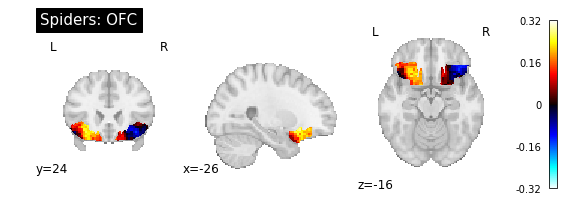

In [58]:
from nilearn import image

# Load your images
atlas_img = har_cor['maps']
nii_map = nib.load(SGSP)

# Resample your image to match the atlas
resampled_map = image.resample_to_img(nii_map, atlas_img, interpolation='nearest')

# Now convert these to NumPy arrays
atlas_data = atlas_img.get_fdata()
resampled_map_data = resampled_map.get_fdata()

# Get the voxels for the left and right Frontal Orbital Cortex
left_ofc_voxels = resampled_map_data[atlas_data == l_ofc_label_index]
right_ofc_voxels = resampled_map_data[atlas_data == r_ofc_label_index]



# Create a copy of the atlas data
combined_data = atlas_data.copy()

# Zero out all voxels not in the Frontal Orbital Cortex
combined_data[(atlas_data != l_ofc_label_index) & (atlas_data != r_ofc_label_index)] = 0

# Replace the values in the Frontal Orbital Cortex with the respective voxel values
combined_data[atlas_data == l_ofc_label_index] = left_ofc_voxels
combined_data[atlas_data == r_ofc_label_index] = right_ofc_voxels

# Now create a new Nifti image with this data, and the same header as the atlas
combined_img = nib.Nifti1Image(combined_data, atlas_img.affine, atlas_img.header)

# plot the new image

plotting.plot_stat_map(combined_img, title='Spiders: OFC', colorbar = True, draw_cross=False, vmax=0.32)

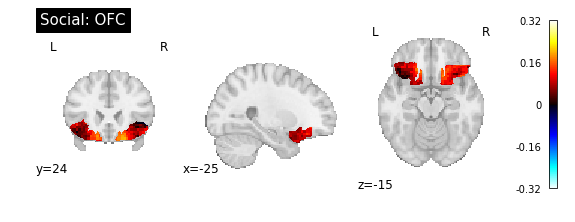

In [59]:
from nilearn import image

# Load your images
atlas_img = har_cor['maps']
nii_map = nib.load(SGSO)

# Resample your image to match the atlas
resampled_map = image.resample_to_img(nii_map, atlas_img, interpolation='nearest')

# Now convert these to NumPy arrays
atlas_data = atlas_img.get_fdata()
resampled_map_data = resampled_map.get_fdata()

# Get the voxels for the left and right Frontal Orbital Cortex
left_ofc_voxels = resampled_map_data[atlas_data == l_ofc_label_index]
right_ofc_voxels = resampled_map_data[atlas_data == r_ofc_label_index]



# Create a copy of the atlas data
combined_data = atlas_data.copy()

# Zero out all voxels not in the Frontal Orbital Cortex
combined_data[(atlas_data != l_ofc_label_index) & (atlas_data != r_ofc_label_index)] = 0

# Replace the values in the Frontal Orbital Cortex with the respective voxel values
combined_data[atlas_data == l_ofc_label_index] = left_ofc_voxels
combined_data[atlas_data == r_ofc_label_index] = right_ofc_voxels

# Now create a new Nifti image with this data, and the same header as the atlas
combined_img = nib.Nifti1Image(combined_data, atlas_img.affine, atlas_img.header)

# plot the new image

plotting.plot_stat_map(combined_img, title='Social: OFC', colorbar = True, draw_cross=False, vmax=0.32)

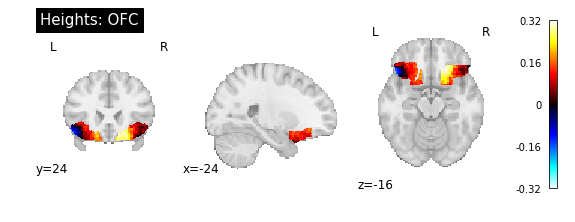

In [60]:
from nilearn import image

# Load your images
atlas_img = har_cor['maps']
nii_map = nib.load(SGH)

# Resample your image to match the atlas
resampled_map = image.resample_to_img(nii_map, atlas_img, interpolation='nearest')

# Now convert these to NumPy arrays
atlas_data = atlas_img.get_fdata()
resampled_map_data = resampled_map.get_fdata()

# Get the voxels for the left and right Frontal Orbital Cortex
left_ofc_voxels = resampled_map_data[atlas_data == l_ofc_label_index]
right_ofc_voxels = resampled_map_data[atlas_data == r_ofc_label_index]



# Create a copy of the atlas data
combined_data = atlas_data.copy()

# Zero out all voxels not in the Frontal Orbital Cortex
combined_data[(atlas_data != l_ofc_label_index) & (atlas_data != r_ofc_label_index)] = 0

# Replace the values in the Frontal Orbital Cortex with the respective voxel values
combined_data[atlas_data == l_ofc_label_index] = left_ofc_voxels
combined_data[atlas_data == r_ofc_label_index] = right_ofc_voxels

# Now create a new Nifti image with this data, and the same header as the atlas
combined_img = nib.Nifti1Image(combined_data, atlas_img.affine, atlas_img.header)

# plot the new image

plotting.plot_stat_map(combined_img, title='Heights: OFC', colorbar = True, draw_cross=False, vmax=0.32)

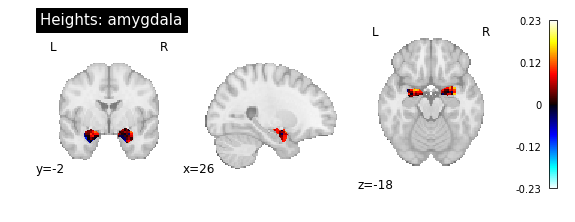

In [61]:
from nilearn import image

# Load your images
atlas_img = har_sub['maps']
nii_map = nib.load(SGH)

# Resample your image to match the atlas
resampled_map = image.resample_to_img(nii_map, atlas_img, interpolation='nearest')

# Now convert these to NumPy arrays
atlas_data = atlas_img.get_fdata()
resampled_map_data = resampled_map.get_fdata()

# Get the voxels for the left and right amygdala
left_amy_voxels = resampled_map_data[atlas_data == l_amy_label_index]
right_amy_voxels = resampled_map_data[atlas_data == r_amy_label_index]



# Create a copy of the atlas data
combined_data = atlas_data.copy()

# Zero out all voxels not in the amygdala
combined_data[(atlas_data != l_amy_label_index) & (atlas_data != r_amy_label_index)] = 0

# Replace the values in the amygdala with the respective voxel values
combined_data[atlas_data == l_amy_label_index] = left_amy_voxels
combined_data[atlas_data == r_amy_label_index] = right_amy_voxels

# Now create a new Nifti image with this data, and the same header as the atlas
combined_img = nib.Nifti1Image(combined_data, atlas_img.affine, atlas_img.header)

# plot the new image

plotting.plot_stat_map(combined_img, title='Heights: amygdala', colorbar = True, draw_cross=False, vmax=0.23)

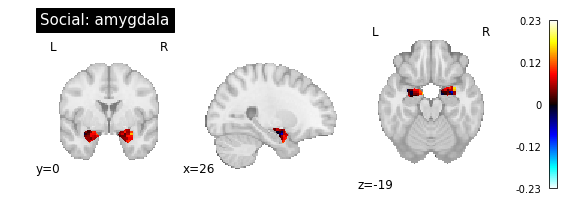

In [63]:
from nilearn import image

# Load your images
atlas_img = har_sub['maps']
nii_map = nib.load(SGSO)

# Resample your image to match the atlas
resampled_map = image.resample_to_img(nii_map, atlas_img, interpolation='nearest')

# Now convert these to NumPy arrays
atlas_data = atlas_img.get_fdata()
resampled_map_data = resampled_map.get_fdata()

# Get the voxels for the left and right amygdala
left_amy_voxels = resampled_map_data[atlas_data == l_amy_label_index]
right_amy_voxels = resampled_map_data[atlas_data == r_amy_label_index]



# Create a copy of the atlas data
combined_data = atlas_data.copy()

# Zero out all voxels not in the amygdala
combined_data[(atlas_data != l_amy_label_index) & (atlas_data != r_amy_label_index)] = 0

# Replace the values in the amygdala with the respective voxel values
combined_data[atlas_data == l_amy_label_index] = left_amy_voxels
combined_data[atlas_data == r_amy_label_index] = right_amy_voxels

# Now create a new Nifti image with this data, and the same header as the atlas
combined_img = nib.Nifti1Image(combined_data, atlas_img.affine, atlas_img.header)

# plot the new image

plotting.plot_stat_map(combined_img, title='Social: amygdala', colorbar = True, draw_cross=False, vmax=0.23)

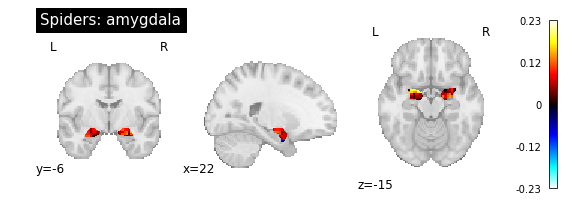

In [62]:
from nilearn import image

# Load your images
atlas_img = har_sub['maps']
nii_map = nib.load(SGSP)

# Resample your image to match the atlas
resampled_map = image.resample_to_img(nii_map, atlas_img, interpolation='nearest')

# Now convert these to NumPy arrays
atlas_data = atlas_img.get_fdata()
resampled_map_data = resampled_map.get_fdata()

# Get the voxels for the left and right amygdala
left_amy_voxels = resampled_map_data[atlas_data == l_amy_label_index]
right_amy_voxels = resampled_map_data[atlas_data == r_amy_label_index]



# Create a copy of the atlas data
combined_data = atlas_data.copy()

# Zero out all voxels not in the amygdala
combined_data[(atlas_data != l_amy_label_index) & (atlas_data != r_amy_label_index)] = 0

# Replace the values in the amygdala with the respective voxel values
combined_data[atlas_data == l_amy_label_index] = left_amy_voxels
combined_data[atlas_data == r_amy_label_index] = right_amy_voxels

# Now create a new Nifti image with this data, and the same header as the atlas
combined_img = nib.Nifti1Image(combined_data, atlas_img.affine, atlas_img.header)

# plot the new image

plotting.plot_stat_map(combined_img, title='Spiders: amygdala', colorbar = True, draw_cross=False, vmax=0.23)

In [30]:


print(amy_sp[0, l_amy_label_index])
print(amy_sp[0, r_amy_label_index])
print(ofc_sp[0, l_ofc_label_index])
print(ofc_sp[0, r_ofc_label_index])

0.1937916166988324
0.09184369539126402
-0.003714401675622769
0.009759622218272446


In [31]:
print(amy_so[0, l_amy_label_index])
print(amy_so[0, r_amy_label_index])
print(ofc_so[0, l_ofc_label_index])
print(ofc_so[0, r_ofc_label_index])

0.1187942617728249
0.1316386181007037
0.10647150884991798
0.04169423231947318


In [32]:
print(amy_h[0, l_amy_label_index])
print(amy_h[0, r_amy_label_index])
print(ofc_h[0, l_ofc_label_index])
print(ofc_h[0, r_ofc_label_index])

0.17155562333820176
0.166852178504951
0.1590842569932536
-0.032511051300447


In [80]:
permutation_test_res_dir = 'results/permutation_test/'
overlay =nib.load(permutation_test_res_dir + 'SGSG_breakdown_overlay.nii.gz')
overlay_data = overlay.get_fdata()

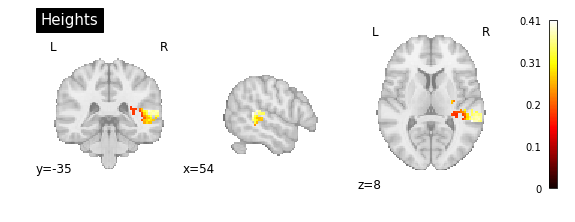

In [86]:
nii_data = nib.load(SGH).get_fdata()
nii_data[overlay_data !=3] = 0
nii_img = nib.Nifti1Image(nii_data, overlay.affine, overlay.header)
plotting.plot_stat_map(nii_img, title='Heights', colorbar=True, draw_cross=False, vmax=0.41)

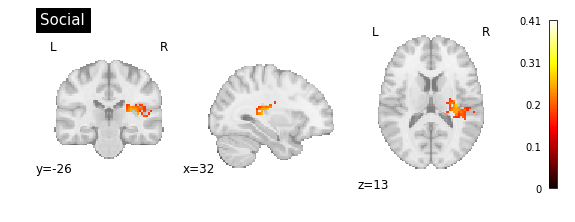

In [89]:
nii_data = nib.load(SGSO).get_fdata()
nii_data[overlay_data !=3] = 0
nii_img = nib.Nifti1Image(nii_data, overlay.affine, overlay.header)
plotting.plot_stat_map(nii_img, title='Social', colorbar=True, draw_cross=False, vmax=0.41)

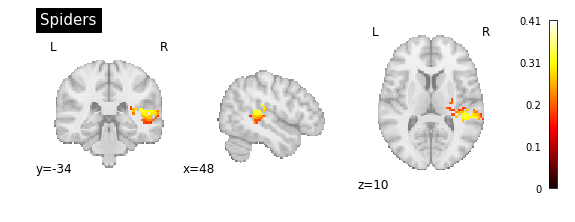

In [90]:
nii_data = nib.load(SGSP).get_fdata()
nii_data[overlay_data !=3] = 0
nii_img = nib.Nifti1Image(nii_data, overlay.affine, overlay.header)
plotting.plot_stat_map(nii_img, title='Spiders', colorbar=True, draw_cross=False, vmax=0.41)

In [ ]:
# local directory set up

data_dir = 'transformed_data/'

logfiles_dir = 'logfiles/'
confounds_dir = 'confounds/'
mask_dir = 'masks/'


visual_reg_dir = 'fmri_regressors/add_visual_reg/'

#mask for 1st level:
mask_path = mask_dir +'FSL_binary_MNI152_T1_3mm_brain.nii.gz'
mask = nib.load(mask_path)

logfile_headers =np.array(['video_name', 'run_number', 'video_category', 'experimenter_high_low', 'same_category_prior', 
                  'cue_onset','cue_offset', 'expected_fear', 'expected_fear_RT',
                 'video_onset', 'video_offset', 'fear_rating', 'arousal_rating', 'valence_rating'
                  'fear_rating_RT', 'arousal_rating_RT', 'valence_rating_RT'])

subjects_list = ['04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','23','25','26','28','29']
sample_n = len(subjects_list)
print("subjects in this analysis:")
print(subjects_list)
print(f"**** n = {sample_n} *****" )
vmax = 12

TR = .001
N_TR = 552
TR_Length = 1
TR_IN_MS = int(TR_Length/TR)

fwhm = 6

mask = nib.load(mask_path)
# resample a gray matter mask
from nilearn.datasets import load_mni152_gm_mask
gm_mask = load_mni152_gm_mask(resolution=3, threshold=0.2, n_iter=2)
gm_mask_img = math_img('img > 0.2', img=gm_mask)
plotting.view_img(mask, threshold=None)


confounds_of_interest = ['CSF',
                        'WhiteMatter',
                        'X', 
                        'Y', 
                        'Z',
                        'RotX',
                        'RotY',
                        'RotZ','FramewiseDisplacement']

In [ ]:
# create events file in [onset, duration, trial_type]

logfile_headers =np.array(['video_name', 'run_number', 'video_category', 'experimenter_high_low', 'same_category_prior', 
                  'cue_onset','cue_offset', 'expected_fear', 'expected_fear_RT',
                 'video_onset', 'video_offset', 'fear_rating', 'arousal_rating', 'valence_rating',
                  'fear_rating_RT', 'arousal_rating_RT', 'valence_rating_RT'])


def AddSteadyStateOutliers(columns_of_interest, all_columns):
    new_columns = copy.deepcopy(columns_of_interest)
    for column in all_columns:
        if 'Outlier' in column:
            new_columns.append(column)
            
    return new_columns


def AddVisualProperty(cov, s, run):
    new_cov = copy.deepcopy(cov)
    visual_reg = pd.read_csv(visual_reg_dir + f'subject_{s}_run_{run}.csv')
    new_cov = pd.concat([cov, visual_reg], axis =1)
    return new_cov

def CreateConfoundMatrix(confound_file_path, 
                         confounds_of_interest, s, run, add_vis=False):
    
    
    confounds = pd.read_csv(confound_file_path, sep='\t')
    
    confounds_of_interest = AddSteadyStateOutliers(confounds_of_interest, confounds.columns)
    
    cov = confounds[confounds_of_interest]
    if add_vis:
        cov = AddVisualProperty(cov, s, run)
    cov.values[np.isnan(cov.values)]=0
    
    return cov


def check_high_low(video_num):
    if video_num in [1,2,3,4,5,6,13,14,15,16,17,18,25,26,27,28,29,30]:
        vid_type = 'high'
    elif video_num in [7,8,9,10,11,12,19,20,21,22,23,24,31,32,33,34,35,36]:
        vid_type = 'low'
    return vid_type    


def get_video_n(video_name):
    # category
    if video_name[0:2]=='he':
        temp = 0
    elif video_name[0:2] == 'so':
        temp = 12
    else:
        temp = 24
    num = video_name[-5:-4]
    # high vs low
    if video_name[-9:-7] == 'lo':
        temp = temp + 6
        
    # social_high_4_replacement  
    if num == 't':
        temp = 16
    else:
        num = int(num)
        temp = temp + num
    return int(temp)

def get_vcat(cn):
    if cn == 1:
        cat = 'Heights'

    elif cn == 2:
        cat = 'Social'

    elif cn == 3:
        cat = 'Spiders'
    else:
        print('no such category number!')
    return cat 

def parse_task_lines(lines, headers, model):
    dm_model = model
    for (i, line) in enumerate(lines):
        cols = line.split(' ')
        video_name = cols[int(np.where(headers == 'video_name')[0])]
        video_number = get_video_n(video_name)
        
        category_number = int(cols[int(np.where(headers == 'video_category')[0])])
        video_category = get_vcat(category_number)
        
        video_onset = float(cols[int(np.where(headers == 'video_onset')[0])])
        video_offset = float(cols[int(np.where(headers == 'video_offset')[0])])  
        video_duration = video_offset - video_onset

        run = int(cols[int(np.where(headers == 'run_number')[0])])
        fear_rating = abs(float(cols[int(np.where(headers == 'fear_rating')[0])]))
        arousal_rating = abs(float(cols[int(np.where(headers == 'arousal_rating')[0])]))
        valence_rating = abs(float(cols[int(np.where(headers == 'valence_rating')[0])]))
        

        if dm_model == 'OneRegPerVid':
            yield [video_onset, video_duration, video_number, run]
            
        elif dm_model == 'VideoCategory':
            yield [video_onset, video_duration, video_category, run]
        elif dm_model == 'SixTRChunk_ThreePerVid':
            yield [video_onset, 6, f'{video_number}_first', run]
            yield [video_onset + 6, video_duration - 12, f'{video_number}_mid', run]
            yield [video_offset - 6, 6, f'{video_number}_last', run]
        elif dm_model == 'FirstSixTRChunk_OnePerVid':
            yield [video_onset, 6, f'{video_number}_first', run]
        elif dm_model == 'LastSixTRChunk_OnePerVid':
            yield [video_offset - 6, 6, f'{video_number}_last', run]
            

def create_events_dataframe(task_csv, run, model):   
    task_lines =[]       
    # df = pd.DataFrame(columns=['onset','duration','trial_type'])
    with open(task_csv, 'r') as task_csv_file:
        task_lines.append(list(parse_task_lines(task_csv_file.readlines()[1:], logfile_headers, model)))

    df = pd.DataFrame(task_lines[0], columns=['onset','duration','trial_type','run'])
    df= df[df['run']==run].drop(columns=['run'])
    return df

In [ ]:
har_cor = datasets.fetch_atlas_harvard_oxford('cortl-maxprob-thr25-1mm', data_dir = '/work/abslab/Yiyu/nilearn_atlas/')
har_cor_labels = har_cor['labels']
l_ofc_label_index = np.where(np.array(har_cor_labels) == 'Left Frontal Orbital Cortex')[0][0]
r_ofc_label_index = np.where(np.array(har_cor_labels) == 'Right Frontal Orbital Cortex')[0][0]


In [ ]:
har_sub = datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr25-1mm', data_dir = '/work/abslab/Yiyu/nilearn_atlas/')
har_sub_labels = har_sub['labels']
l_amy_label_index = np.where(np.array(har_sub_labels) == 'Left Amygdala')[0][0]
r_amy_label_index = np.where(np.array(har_sub_labels) == 'Right Amygdala')[0][0]


In [ ]:
from nilearn import datasets, input_data, image
subc_masker = input_data.NiftiLabelsMasker(labels_img=har_sub.maps, standardize=True)
cort_masker = input_data.NiftiLabelsMasker(labels_img=har_cor.maps, standardize=True)

In [ ]:
calculate = True
ts_type = 'raw'
if calculate:    
    low_vid_l_amy_ts, low_vid_r_amy_ts, low_vid_l_ofc_ts, low_vid_r_ofc_ts = [], [], [],[]
    high_vid_l_amy_ts, high_vid_r_amy_ts, high_vid_l_ofc_ts, high_vid_r_ofc_ts = [], [], [],[]


    duration = 35 # plot the 10 seconds after the videos

    for s in subjects_list[0:1]:
        print(f'running subject {s}')


        task_file = glob.glob(logfiles_dir + f'AffVids_logfile_{s}_edited.txt') 
        task_csv = task_file[0]

        for run in [1,2,3]:
            events = create_events_dataframe(task_csv, run, 'OneRegPerVid').reset_index(drop=True)
            ##get confounds info:
            confounds_str = f'sub-{s}_task-AffVids_run-0{run}_bold_confounds.tsv'
            cov = CreateConfoundMatrix(confounds_dir + confounds_str, confounds_of_interest, s, run, add_vis=False)

            func_str = f'{s}/run{run}.nii.gz'
            func_path = data_dir + func_str
            fmri_img = nib.load(func_path)
            if ts_type =='raw':
                cleaned_img = image.clean_img(fmri_img, confounds=cov.values, high_pass=0.01, t_r=1, 
                                              detrend=False, standardize=True, mask_img=mask)

            elif ts_type == 'predicted':
                fmri_glm = FirstLevelModel(t_r=1,
                                           noise_model='ar3',
                                           standardize=True,
                                           hrf_model='spm',
                                           drift_model='cosine',
                                           high_pass=.01, mask_img=gm_mask_img,smoothing_fwhm=6, minimize_memory=False)
                fmri_glm.fit(fmri_img, events, confounds=cov)
                cleaned_img = fmri_glm.predicted[0]
            
            subc_ts = subc_masker.fit_transform(cleaned_img)
            cort_ts = cort_masker.fit_transform(cleaned_img)

            # Slice the time series data according to start_time and duration
            for i in range(len(events)):
                onset = int(events.loc[i,'onset'])

                video = int(events.loc[i, 'trial_type'])

                if check_high_low(video) == 'low':
                    low_vid_l_amy_ts.append(subc_ts[onset : onset + duration, l_amy_label_index])
                    low_vid_r_amy_ts.append(subc_ts[onset : onset + duration, r_amy_label_index])
                    low_vid_l_ofc_ts.append(cort_ts[onset : onset + duration, l_ofc_label_index])
                    low_vid_r_ofc_ts.append(cort_ts[onset : onset + duration, r_ofc_label_index])
                elif check_high_low(video) == 'high':
                    high_vid_l_amy_ts.append(subc_ts[onset : onset + duration, l_amy_label_index])
                    high_vid_r_amy_ts.append(subc_ts[onset : onset + duration, r_amy_label_index])
                    high_vid_l_ofc_ts.append(cort_ts[onset : onset + duration, l_ofc_label_index])
                    high_vid_r_ofc_ts.append(cort_ts[onset : onset + duration, r_ofc_label_index])


    low_video_l_amy_mean = np.mean(low_vid_l_amy_ts, axis =0)
    high_video_l_amy_mean = np.mean(high_vid_l_amy_ts, axis =0)
    low_video_l_ofc_mean = np.mean(low_vid_l_ofc_ts, axis =0)
    high_video_l_ofc_mean = np.mean(high_vid_l_ofc_ts, axis =0)
    
    low_video_r_amy_mean = np.mean(low_vid_r_amy_ts, axis =0)
    high_video_r_amy_mean = np.mean(high_vid_r_amy_ts, axis =0)
    low_video_r_ofc_mean = np.mean(low_vid_r_ofc_ts, axis =0)
    high_video_r_ofc_mean = np.mean(high_vid_r_ofc_ts, axis =0)

    # save:
    
    np.save(base_dir + f'fmri_results/{ts_type}_low_video_l_amy_mean.npy', low_video_l_amy_mean) 
    np.save(base_dir + f'fmri_results/{ts_type}_high_video_l_amy_mean.npy', high_video_l_amy_mean) 
    np.save(base_dir + f'fmri_results/{ts_type}_low_video_l_ofc_mean.npy', low_video_l_ofc_mean) 
    np.save(base_dir + f'fmri_results/{ts_type}_high_video_l_ofc_mean.npy', high_video_l_ofc_mean) 
    
    np.save(base_dir + f'fmri_results/{ts_type}_low_video_r_amy_mean.npy', low_video_r_amy_mean) 
    np.save(base_dir + f'fmri_results/{ts_type}_high_video_r_amy_mean.npy', high_video_r_amy_mean) 
    np.save(base_dir + f'fmri_results/{ts_type}_low_video_r_ofc_mean.npy', low_video_r_ofc_mean) 
    np.save(base_dir + f'fmri_results/{ts_type}_high_video_r_ofc_mean.npy', high_video_r_ofc_mean) 


else:
    low_video_l_amy_mean = np.load(base_dir + f'fmri_results/{ts_type}_low_video_l_amy_mean.npy')
    high_video_l_amy_mean = np.load(base_dir + f'fmri_results/{ts_type}_high_video_l_amy_mean.npy')
    low_video_l_ofc_mean = np.load(base_dir + f'fmri_results/{ts_type}_low_video_l_ofc_mean.npy')
    high_video_l_ofc_mean = np.load(base_dir + f'fmri_results/{ts_type}_high_video_l_ofc_mean.npy')
    
    low_video_r_amy_mean = np.load(base_dir + f'fmri_results/{ts_type}_low_video_r_amy_mean.npy')
    high_video_r_amy_mean = np.load(base_dir + f'fmri_results/{ts_type}_high_video_r_amy_mean.npy')
    low_video_r_ofc_mean = np.load(base_dir + f'fmri_results/{ts_type}_low_video_r_ofc_mean.npy')
    high_video_r_ofc_mean = np.load(base_dir + f'fmri_results/{ts_type}_high_video_r_ofc_mean.npy')
    

    

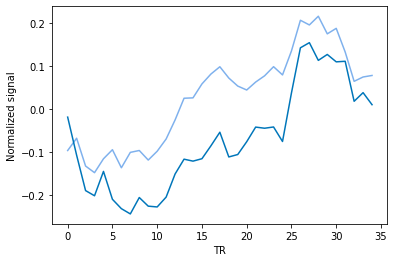

In [13]:
plt.figure()

# Plot the time series
plt.plot(low_video_l_amy_mean, label='low fear left amygdala',color = "#7FB1ED")
plt.plot(high_video_l_amy_mean, label='high fear left amygdala',color = "#0076BA")


# Label axes
plt.xlabel('TR')
plt.ylabel('Normalized signal')

# Show the plot
plt.show()

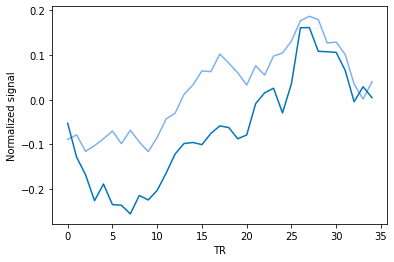

In [14]:
plt.figure()

# Plot the time series
plt.plot(low_video_r_amy_mean, label='low fear right amygdala',color = "#7FB1ED")
plt.plot(high_video_r_amy_mean, label='high fear right amygdala',color = "#0076BA")


# Label axes
plt.xlabel('TR')
plt.ylabel('Normalized signal')

# Show the plot
plt.show()

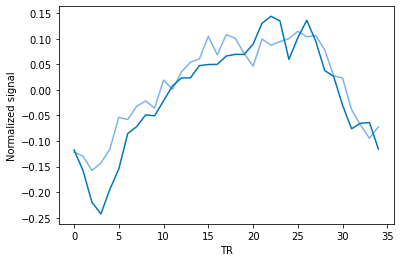

In [32]:
plt.figure()

# Plot the time series
plt.plot(low_video_l_ofc_mean, label='low fear left ofc',color = "#7FB1ED")
plt.plot(high_video_l_ofc_mean, label='high fear left ofc',color = "#0076BA")



# Label axes
plt.xlabel('TR')
plt.ylabel('Normalized signal')

# Show the plot
plt.show()

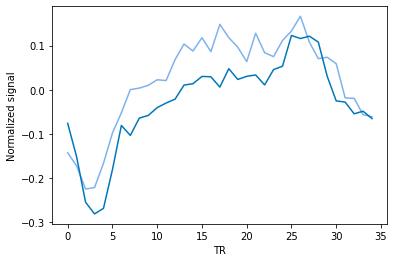

In [15]:
plt.figure()

# Plot the time series
plt.plot(low_video_r_ofc_mean, label='low fear right ofc', color = "#7FB1ED")
plt.plot(high_video_r_ofc_mean, label='high fear right ofc', color = "#0076BA")


# Label axes
plt.xlabel('TR')
plt.ylabel('Normalized signal')

# Show the plot
plt.show()

In [16]:
har_cor['labels']

['Background',
 'Left Frontal Pole',
 'Right Frontal Pole',
 'Left Insular Cortex',
 'Right Insular Cortex',
 'Left Superior Frontal Gyrus',
 'Right Superior Frontal Gyrus',
 'Left Middle Frontal Gyrus',
 'Right Middle Frontal Gyrus',
 'Left Inferior Frontal Gyrus, pars triangularis',
 'Right Inferior Frontal Gyrus, pars triangularis',
 'Left Inferior Frontal Gyrus, pars opercularis',
 'Right Inferior Frontal Gyrus, pars opercularis',
 'Left Precentral Gyrus',
 'Right Precentral Gyrus',
 'Left Temporal Pole',
 'Right Temporal Pole',
 'Left Superior Temporal Gyrus, anterior division',
 'Right Superior Temporal Gyrus, anterior division',
 'Left Superior Temporal Gyrus, posterior division',
 'Right Superior Temporal Gyrus, posterior division',
 'Left Middle Temporal Gyrus, anterior division',
 'Right Middle Temporal Gyrus, anterior division',
 'Left Middle Temporal Gyrus, posterior division',
 'Right Middle Temporal Gyrus, posterior division',
 'Left Middle Temporal Gyrus, temporooccipita

In [ ]:
# examine the coefficient from these ROIs:


sg_h = base_dir + "fmri_results/permutation_test/train_Situation_General_test_Heights_permutation_distribution_pearsonr.nii.gz"
sg_so = base_dir + "fmri_results/permutation_test/train_Situation_General_test_Social_permutation_distribution_pearsonr.nii.gz"
sg_sp = base_dir + "fmri_results/permutation_test/train_Situation_General_test_Spiders_permutation_distribution_pearsonr.nii.gz"

In [61]:
for i in range(len(events)):
    events.loc[i,'duration']

In [ ]:
dm_name = 'SNR_timecourse'
res_dir = base_dir + f'fmri_results/{dm_name}/'
if not os.path.isdir(res_dir):
        os.mkdir(res_dir)


for s in subjects_list:
    print(f'running subject {s}')

        
    task_file = glob.glob(logfiles_dir + f'AffVids_logfile_{s}_edited.txt') 
    task_csv = task_file[0]
    
    for run in [1,2,3]:
        events = create_events_dataframe(task_csv, run, 'OneRegPerVid')
        ##get confounds info:
        confounds_str = f'sub-{s}_task-AffVids_run-0{run}_bold_confounds.tsv'
        cov = CreateConfoundMatrix(confounds_dir + confounds_str, confounds_of_interest, s, run, add_vis=True)

        fmri_glm = FirstLevelModel(t_r=1,
                           noise_model='ar3',
                           standardize=True,
                           hrf_model='spm',
                           drift_model='cosine',
                           high_pass=.01, mask_img=gm_mask_img,smoothing_fwhm=6)
        
        func_str = f'{s}/run{run}.nii.gz'
        func_path = data_dir + func_str
        fmri_img = nib.load(func_path)
        fmri_glm = fmri_glm.fit(fmri_img, events, confounds=cov)
        
        # save design_matrix for every run
        design_matrix = fmri_glm.design_matrices_[0]

        plot_design_matrix(design_matrix, output_file=join(sub_output_dir, f'design_matrix_run{run}.png'))
        contrast_matrix = np.eye(design_matrix.shape[1])
        # extract the betas
        for i in range(12):
            print(f'saving beta for video {design_matrix.columns[i]}')
            eff = fmri_glm.fit_transform()
            nii_file_path = sub_output_dir + f'/sub-{s}_run-{run}_beta_video-{design_matrix.columns[i]}_gm_visreg.nii.gz'
            nib.save(eff, nii_file_path)

        
        